### 数据预处理及第一个可视化
#####  1、按照10岁为间隔分为各个年龄组，分析资本投资的损失(capital_loss)和收益方面(capital_gain)平均值的情况。
#####  2、用折线图进行展示，通过了解各年龄段的资本投资，情况来找出适宜的UVW大学招生的合适年龄群体
##### 3、预期：在中间年龄段有较大的资本收益（资本投资收益较高，损失较少）。
##### 4、数据情况：
#####  （1）资本投资收益情况：50-59年龄组资本收益增长趋势趋缓，60-69年龄组资本收益略有下降，在80-89年龄组资本收益大幅度下降。
#####    (2 )资本投资损失情况:   在50-59年龄组和60-69年龄组也有下降，但是和其他年龄段比较差异不多。
##### 5、最后结论：由于从50-59岁年龄组开始，存在资本收入增长趋缓的情况，因此对于UVW大学来说，不管是本科生还是研究室都要集中在40-49年龄组之前。

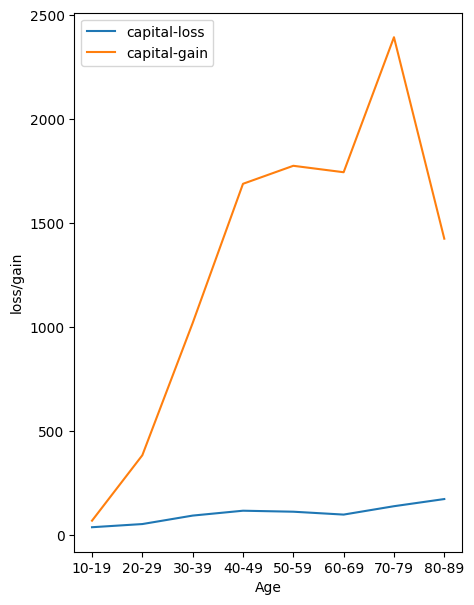

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

columns = [
"age",  # 年龄, int
"workclass",  # 雇主类型、雇佣类型，离散
"fnlwgt", #人口普查员认为观测值的人数，int
"education",  # 教育程度，离散
"education-num", # 受教育年限，int
"marital-status",  # 婚姻状况，离散
"occupation",  # 职业，离散
"relationship",  #家庭角色，离散
"race",  # 种族， 离散
"sex", # 性别， 离散
"capital-gain", # 资本收益， 数值
"capital-loss", # 资本损失， 数值
"hours-per-week", # 每周工作时间， int
"native-country", # 原生国籍，离散 
"income" # 收入是否大于50K， 布尔
]



# enum_columns = [
# "workclass",  # 雇主类型、雇佣类型，离散
# "education",  # 教育程度，离散
# "marital-status",  # 婚姻状况，离散
# ]

def preprocessing_data():
    df = pd.read_csv('adult.data', header=None)

    df.columns = columns

    # 进行数据清洗，过滤掉为取值为 ? 的数据
    # 第一步需要先去掉所有value值中空格
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # 将 ? 替换为 np.nan
    df = df.replace("?", np.nan)
    df = df.replace(" ", np.nan)
    df = df.replace("", np.nan)

    # 过滤掉为 np.nan 的数据
    df_filter = df.dropna()

    nan_columns = df_filter.columns[df_filter.isnull().any()]

    # 打印包含NaN值的行
    nan_rows = df_filter[df_filter.isnull().any(axis=1)]

    return df_filter

adult_df = preprocessing_data()

#不同年龄（age)的人（按照年龄组来分）在资本投资的损失(capital_loss)和收益方面(capital_gain)是否存在巨大的差异，
#用折线图进行显示。预期：在中间年龄段，有较大的资本收益。

age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
adult_df['age_bin'] = pd.cut(adult_df["age"], bins=age_bins, labels=age_labels)


edu_bins = [0, 6, 9, 12, 16, 30]
# edu_labels = ['0-6', '6-9', '9-12', '12-16', '16+']
# df['edu_years_bin'] = pd.cut(df["education-num"], bins=edu_bins, labels=edu_labels)

loss = adult_df.groupby('age_bin')['capital-loss'].mean()
gain = adult_df.groupby('age_bin')['capital-gain'].mean()
# 画图 
#print(age_labels , loss.tolist() , gain.tolist())
plt.figure(figsize=(5, 7))
plt.plot(age_labels, loss.tolist() ,label='capital-loss')
plt.plot(age_labels, gain.tolist() ,label='capital-gain')

plt.legend()  #显示上面的label
plt.xlabel('Age')
plt.ylabel('loss/gain')

plt.show()


### 第二个可视化
#####  1、结合教育（education），了解收入（income）情况，用柱状图进行显示（不同学历水平各一组，高低收入同图或分图显示）。
#####  2、更直观地展示受教育情况对一个人整个年龄段收入的影响。
#####  3、预期：受教育程度越高，高收入人数占比越高。
#####  4、可视化分析：
######    （1）随着受教育程度的提高，50K以上年收入占比也在增加（最典型的在9th,10th,11th,12th这些受教育差异极小组数据变化趋势也非常明显）
######    （2）甚至PreSchool（学前教育组）50K以上收入占比为0%。
######    （3）而且在接受过大学教育、学士、硕士、博士也是高收入占比逐步提高。
######    （4）另外看到一个有意思的现象博士和教授的高收入者占比几乎是一样的。（看来这是一个几乎平行或者几乎重叠的群体）
#####  5、结论：总体来说提高受教育水平，是提高收入的最直接和最有效的手段。这些数据本身就是招生时最好的宣传材料。


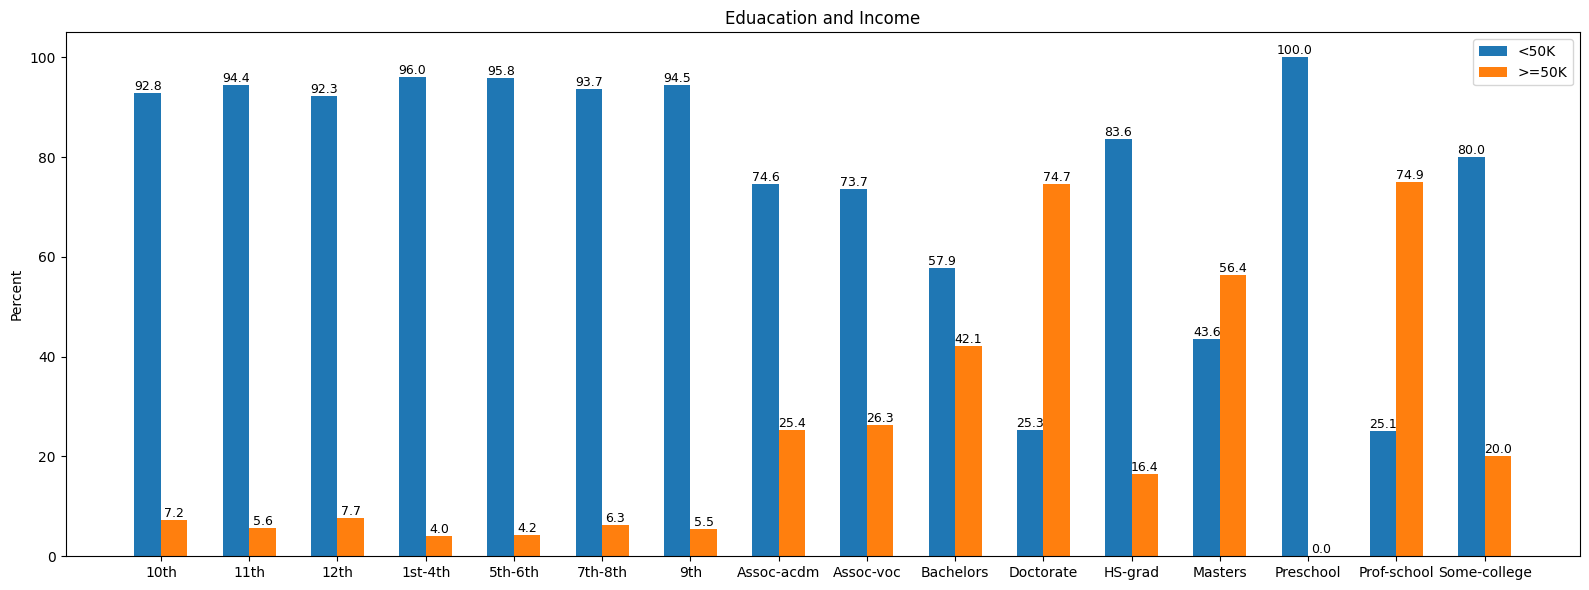

In [6]:
# 结合教育（education），了解收入（income）情况，用柱状图进行显示（总体情况一条，不同学历水平各一条，高低收入同图或分图显示）。以便更直观地展示受教育情况对一个人整个年龄段收入的影响。

adult_df_income_lt_50k = adult_df[adult_df['income']=='<=50K']
adult_df_income_mt_50k = adult_df[adult_df['income']=='>50K']
all_50k = adult_df
#print(adult_df_income_lt_50k)
# 这里还需要处理，除以人员的总数就是高低收入的占比
lt_50k = adult_df_income_lt_50k.groupby('education')['income'].count().tolist()
mt_50k = adult_df_income_mt_50k.groupby('education')['income'].count().tolist()
mt_50k.insert(13,0) #insert  Prof-school = 0 for mt_50k
all_income = adult_df.groupby('education')['income'].count().tolist()

edu_grade = adult_df_income_lt_50k.groupby('education')['income'].count().index.tolist() 

ll = [a/b*100 for a,b in zip(lt_50k,all_income)]
mm = [a/b*100 for a,b in zip(mt_50k,all_income)]

x = np.arange(len(edu_grade))  # x轴刻度标签位置
width = 0.3  # 柱子的宽度

plt.figure(figsize=(16, 6))
plt.bar(x - width/2, ll, width, label='<50K')
plt.bar(x + width/2, mm, width, label='>=50K')

for a,b in zip(x - width/2,ll):   #柱子上的数字显示
    plt.text(a,b,'%.1f'%b,ha='center',va='bottom',fontsize=9);
for a,b in zip(x + width/2,mm):
    plt.text(a,b,'%.1f'%b,ha='center',va='bottom',fontsize=9);

plt.ylabel('Percent')
plt.title('Eduacation and Income')
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=edu_grade)
plt.legend()
plt.tight_layout()

#https://blog.csdn.net/TH_NUM/article/details/80601800
#.pyplot.barh(y, width, height, left, align=‘center’, **kwargs)

plt.show()


### 第三个可视化
##### 1、使用词云显示不同原生国籍（native_country）和收入（income）的关系。
##### 2、哪些原生国籍高收入占比高，哪些原生国籍低收入占比过高。
##### 3、以便UVN大学据此做好招生，对目标人群做针对性的加强和宣传。
##### 4、可视化分析：
######   （1）墨西哥在总的人口中占比最高，在收入<50K人口中占比也是最高，但是在50K以上人口中占比明显缩小（在排名前三只有），那么说明原生墨西哥的人口低收入者较多，高收入者较少。
######   （2）另外在50K以上的高收入人口中菲律宾、德国、意大利、英格兰、中国等亚洲和欧洲国家人口占比比在总体人口占比中要高。
######   （3）墨西哥、萨尔瓦多、波多黎各等中南美洲的人口明显在低收入占比高于在总体人群中的占比。
###### 5、对于50K以上的高收入人口中菲律宾、德国、意大利、英格兰、中国等亚洲和欧洲国家人口占比比在总体人口占比中要高，UVW作为目标人群要重点加强招生宣传。

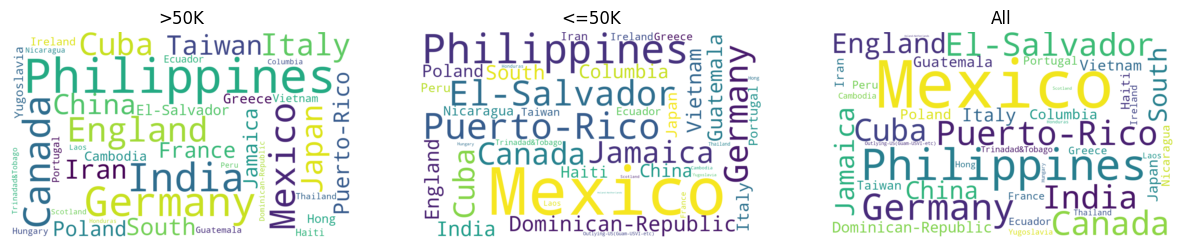

In [64]:


from wordcloud import WordCloud
df0 = adult_df[adult_df['income']
                      == '>50K'].groupby('native-country').size().to_dict()
df1 = adult_df[adult_df['income']
                      == '<=50K'].groupby('native-country').size().to_dict()
df2 = adult_df.groupby('native-country').size().to_dict()
del df0['United-States']
del df1['United-States']
del df2['United-States']

wordcloud1 = WordCloud(background_color='white', width=1000, height=600, collocations=False,
                       colormap="viridis").generate_from_frequencies(df0)
wordcloud2 = WordCloud(background_color='white', width=1000, height=600, collocations=False,
                       colormap="viridis").generate_from_frequencies(df1)
wordcloud3 = WordCloud(background_color='white', width=1000, height=600, collocations=False,
                       colormap="viridis").generate_from_frequencies(df2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].set_title('>50K')
axes[0].axis('off')

axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].set_title('<=50K')
axes[1].axis('off')

axes[2].imshow(wordcloud3, interpolation='bilinear')
axes[2].set_title('All')
axes[2].axis('off')

plt.show()